# Self-Driving Car Engineer Nanodegree


## Project: **Finding Lane Lines on the Road** 
***


## Import Package

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
import os
%matplotlib inline

## Read in an Image

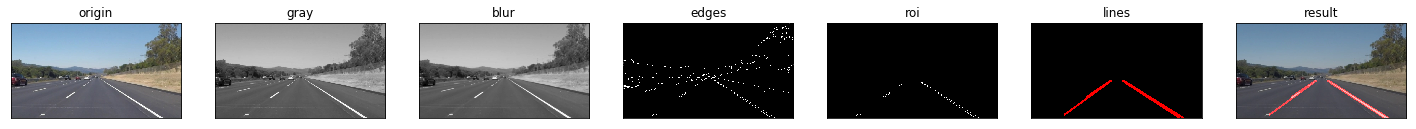

In [58]:
#reading in an image
image = mpimg.imread('test_images/solidWhiteRight.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blur, 50, 150)
roi = get_roi(edges)
lines = hough_lines(roi, 2, np.pi / 180, 50, 100, 160)
result = cv2.addWeighted(image, 0.8, lines, 1., 0.)

plt.figure(figsize=(25,15))
plt.subplot(171), plt.imshow(image)
plt.title("origin"), plt.xticks([]), plt.yticks([])
plt.subplot(172), plt.imshow(gray, cmap='gray')
plt.title("gray"), plt.xticks([]), plt.yticks([])
plt.subplot(173), plt.imshow(blur, cmap='gray')
plt.title("blur"), plt.xticks([]), plt.yticks([])
plt.subplot(174), plt.imshow(edges, cmap='gray')
plt.title("edges"), plt.xticks([]), plt.yticks([])
plt.subplot(175), plt.imshow(roi, cmap='gray')
plt.title("roi"), plt.xticks([]), plt.yticks([])
plt.subplot(176), plt.imshow(lines, cmap='gray')
plt.title("lines"), plt.xticks([]), plt.yticks([])
plt.subplot(177), plt.imshow(result)
plt.title("result"), plt.xticks([]), plt.yticks([])
plt.show()

## Ideas for Lane Detection Pipeline

**Some OpenCV functions that might be useful for this project are:**

`cv2.inRange()` for color selection  
`cv2.fillPoly()` for regions selection  
`cv2.line()` to draw lines on an image given endpoints  
`cv2.addWeighted()` to coadd / overlay two images
`cv2.cvtColor()` to grayscale or change color
`cv2.imwrite()` to output images to file  
`cv2.bitwise_and()` to apply a mask to an image


## Helper Functions
Below are some helper functions to complete this project. 

In [16]:
def get_roi(img):
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    # define vertices by four points
    xsize = img.shape[1]
    ysize = img.shape[0]
    left_bottom = (80, ysize)
    left_top = (xsize / 2 - 50, ysize / 2 + 50)
    right_bottom = (xsize - 80, ysize)
    right_top = (xsize / 2 + 50, ysize / 2 + 50)
    vertices = np.array([[left_bottom, left_top, right_top, right_bottom]], dtype=np.int32)
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=10):
    for line in lines:
        cv2.line(img, (line[0][0], line[0][1]), (line[0][2], line[0][3]), color, thickness)
        
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len,
                            maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

## Build a Lane Finding Pipeline



Build the pipeline and run your solution on all test_images. Make copies into the `test_images_output` directory, and you can use the images in your writeup report.

Try tuning the various parameters, especially the low and high Canny thresholds as well as the Hough lines parameters.

In [1]:
frames = os.listdir("test_images/")

for frame in frames:
    image = mpimg.imread("test_images/" + frame)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blur, 50, 150)
    roi = get_roi(edges)
    lines = hough_lines(roi, 2, np.pi / 180, 50, 100, 160)
    result = cv2.addWeighted(image, 0.8, lines, 1., 0.)

    plt.figure(figsize=(25,15))
    plt.subplot(171), plt.imshow(image)
    plt.title("origin"), plt.xticks([]), plt.yticks([])
    plt.subplot(172), plt.imshow(gray, cmap='gray')
    plt.title("gray"), plt.xticks([]), plt.yticks([])
    plt.subplot(173), plt.imshow(blur, cmap='gray')
    plt.title("blur"), plt.xticks([]), plt.yticks([])
    plt.subplot(174), plt.imshow(edges, cmap='gray')
    plt.title("edges"), plt.xticks([]), plt.yticks([])
    plt.subplot(175), plt.imshow(roi, cmap='gray')
    plt.title("roi"), plt.xticks([]), plt.yticks([])
    plt.subplot(176), plt.imshow(lines, cmap='gray')
    plt.title("lines"), plt.xticks([]), plt.yticks([])
    plt.subplot(177), plt.imshow(result)
    plt.title("result"), plt.xticks([]), plt.yticks([])
    plt.show()

NameError: name 'os' is not defined

## Test on Videos

In [17]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [18]:
def process_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blur, 50, 200)
    roi = get_roi(edges)
    lines = hough_lines(roi, 2, np.pi / 180, 50, 100, 160)
    result = cv2.addWeighted(image, 0.8, lines, 1., 0.)
    return result

Let's try the one with the solid white lane on the right first ...

In [5]:
white_output = 'test_videos_output/white.mp4'
clips = VideoFileClip("test_videos/solidWhiteRight.mp4")
line_clips = clips.fl_image(process_image) 
line_clips.write_videofile(white_output, audio=False)

HTML("""<video width="480" height="270" controls><source src="{0}"></video>""".format(white_output))

[MoviePy] >>>> Building video test_videos_output/white.mp4
[MoviePy] Writing video test_videos_output/white.mp4


100%|█████████▉| 221/222 [00:06<00:00, 36.16it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/white.mp4 



Let's try the one with the solid yellow lane on the left first ...

In [6]:
yellow_output = 'test_videos_output/yellow.mp4'
clips = VideoFileClip("test_videos/solidYellowLeft.mp4")
line_clips = clips.fl_image(process_image) 
line_clips.write_videofile(yellow_output, audio=False)

HTML("""<video width="480" height="270" controls><source src="{0}"></video>""".format(yellow_output))

[MoviePy] >>>> Building video test_videos_output/yellow.mp4
[MoviePy] Writing video test_videos_output/yellow.mp4


100%|█████████▉| 681/682 [00:20<00:00, 32.89it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/yellow.mp4 



## Improved lane finding pipeline
There are several lines found by pipeline for a piece of lane line, we should find an averaged line for that piece of lane line.
Moreover, some lines are not continuous, they detected as a set of segments, so we need to extrapolate them to a full lane line.


In [19]:
def divide_lines(img, lines):
    x_middle = img.shape[1] / 2
    all_left_lines = []
    all_right_lines = []
    left_lines = []
    right_lines = []
    
    for line in lines:
        if abs(line[0][0] - line[0][2]) > 2:
            k = (line[0][3] - line[0][1]) * 1.0 / (line[0][2] - line[0][0])
            if line[0][0] < x_middle and k < -0.5:
                all_left_lines.append(line[0])
            elif line[0][2] > x_middle and k > 0.5:
                all_right_lines.append(line[0])
                
    all_left_lines.sort(key=lambda x: x[0])
    all_right_lines.sort(key=lambda x: x[0])
    
    for line in all_left_lines:
        if len(left_lines) != 0:
            if line[0] > left_lines[-1][2] and line[1] < left_lines[-1][3]:
                left_lines.append([left_lines[-1][2], left_lines[-1][3], line[0], line[1]])
                left_lines.append([line[0], line[1], line[2], line[3]])
        else:
            left_lines.append([line[0], line[1], line[2], line[3]])

    for line in all_right_lines:
        if len(right_lines) != 0:
            if line[0] > right_lines[-1][2] and line[1] > right_lines[-1][3]:
                right_lines.append([right_lines[-1][2], right_lines[-1][3], line[0], line[1]])
                right_lines.append([line[0], line[1], line[2], line[3]])
        else:
            right_lines.append([line[0], line[1], line[2], line[3]])

    return left_lines, right_lines


def improved_lines(left_lines, right_lines, shape):
    ysize = shape[0]

    left_bottom = [left_lines[0][0], left_lines[0][1]]
    left_top = [left_lines[-1][2], left_lines[-1][3]]
    right_top = [right_lines[0][0], right_lines[0][1]]
    right_bottom = [right_lines[-1][2], right_lines[-1][3]]

    k_left = (left_top[1] - left_bottom[1]) * 1.0 / (left_top[0] - left_bottom[0])
    k_right = (right_top[1] - right_bottom[1]) * 1.0 / (right_top[0] - right_bottom[0])

    left_bottom2 = [int(left_bottom[0] - (left_bottom[1] - ysize) / k_left), ysize]
    left_top2 = [int(left_top[0] - (left_top[1] - (ysize / 2 + 50)) / k_left), int(ysize / 2 + 50)]
    right_bottom2 = [int(right_bottom[0] - (right_bottom[1] - ysize) / k_right), ysize]
    right_top2 = [int(right_top[0] - (right_top[1] - (ysize / 2 + 50)) / k_right), int(ysize / 2 + 50)]
    
    left_lines.append([left_bottom[0], left_bottom[1], left_bottom2[0], left_bottom2[1]])
    left_lines.append([left_top[0], left_top[1], left_top2[0], left_top2[1]])
    right_lines.append([right_bottom[0], right_bottom[1], right_bottom2[0], right_bottom2[1]])
    right_lines.append([right_top[0], right_top[1], right_top2[0], right_top2[1]])

    return left_lines, right_lines

def draw_lines2(img, lines, color=[255, 0, 0], thickness=10):
    for line in lines:
        cv2.line(img, (line[0], line[1]), (line[2], line[3]), color, thickness)
        

def improved_hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len,
                            maxLineGap=max_line_gap)
    
    left_lines, right_lines = divide_lines(img, lines)
    left_lines, right_lines = improved_lines(left_lines, right_lines, img.shape)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines2(line_img, left_lines, [255, 0, 0], 10)
    draw_lines2(line_img, right_lines, [0, 255, 0], 10)

    return line_img

In [20]:
def improved_process_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blur, 50, 200)
    roi = get_roi(edges)
    lines = improved_hough_lines(roi, 2, np.pi / 180, 15, 5, 20)
    result = cv2.addWeighted(image, 0.8, lines, 1., 0.)
    return result

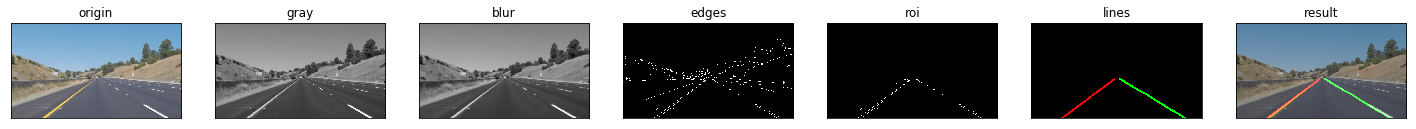

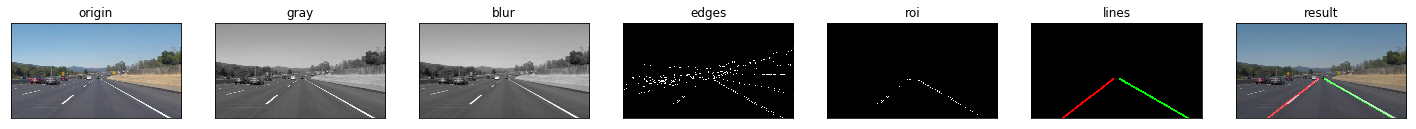

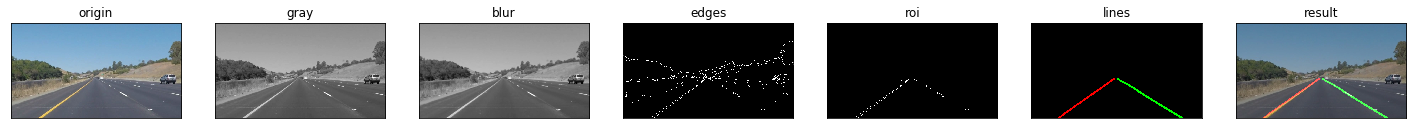

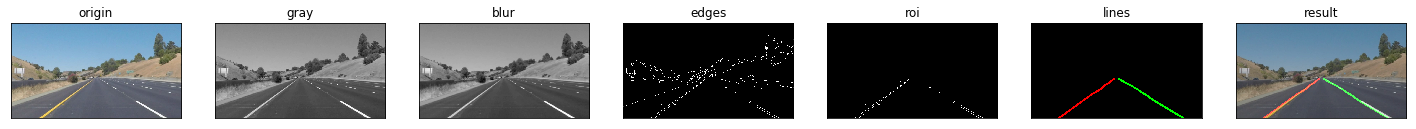

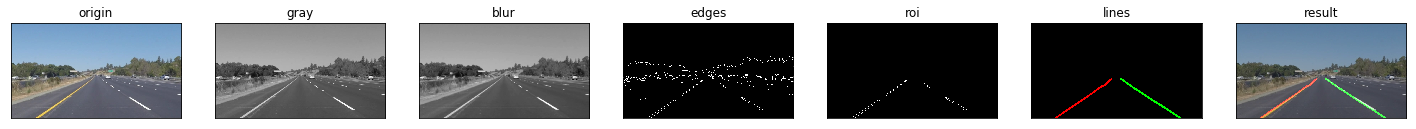

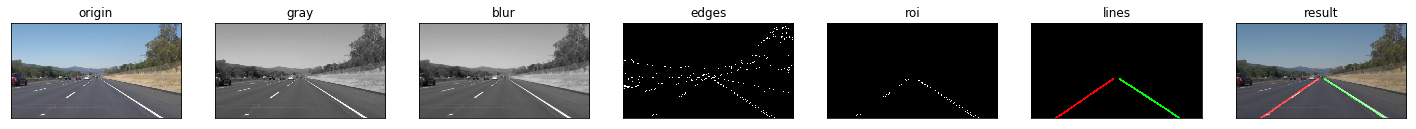

In [12]:
for frame in frames:
    image = mpimg.imread("test_images/" + frame)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blur, 50, 150)
    roi = get_roi(edges)
    lines = improved_hough_lines(roi, 2, np.pi / 180, 15, 5, 20)
    result = cv2.addWeighted(image, 0.8, lines, 1., 0.)

    plt.figure(figsize=(25,15))
    plt.subplot(171), plt.imshow(image)
    plt.title("origin"), plt.xticks([]), plt.yticks([])
    plt.subplot(172), plt.imshow(gray, cmap='gray')
    plt.title("gray"), plt.xticks([]), plt.yticks([])
    plt.subplot(173), plt.imshow(blur, cmap='gray')
    plt.title("blur"), plt.xticks([]), plt.yticks([])
    plt.subplot(174), plt.imshow(edges, cmap='gray')
    plt.title("edges"), plt.xticks([]), plt.yticks([])
    plt.subplot(175), plt.imshow(roi, cmap='gray')
    plt.title("roi"), plt.xticks([]), plt.yticks([])
    plt.subplot(176), plt.imshow(lines, cmap='gray')
    plt.title("lines"), plt.xticks([]), plt.yticks([])
    plt.subplot(177), plt.imshow(result)
    plt.title("result"), plt.xticks([]), plt.yticks([])
    plt.show()

In [10]:
white_output_improved = 'test_videos_output/white-improved.mp4'
clips = VideoFileClip("test_videos/solidWhiteRight.mp4")
line_clips = clips.fl_image(improved_process_image) 
line_clips.write_videofile(white_output_improved, audio=False)

HTML("""<video width="480" height="270" controls><source src="{0}">
</video>""".format(white_output_improved))

[MoviePy] >>>> Building video test_videos_output/white-improved.mp4
[MoviePy] Writing video test_videos_output/white-improved.mp4


100%|█████████▉| 221/222 [00:06<00:00, 35.26it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/white-improved.mp4 



In [13]:
yellow_output_improved = 'test_videos_output/yellow-improved.mp4'
clips = VideoFileClip('test_videos/solidYellowLeft.mp4')
yellow_clip = clips.fl_image(improved_process_image)
%time yellow_clip.write_videofile(yellow_output_improved, audio=False)

HTML("""<video width="480" height="270" controls><source src="{0}">
</video>""".format(yellow_output_improved))

[MoviePy] >>>> Building video test_videos_output/yellow-improved.mp4
[MoviePy] Writing video test_videos_output/yellow-improved.mp4


100%|█████████▉| 681/682 [00:20<00:00, 32.90it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/yellow-improved.mp4 

CPU times: user 12.2 s, sys: 416 ms, total: 12.6 s
Wall time: 21.6 s


## Optional Challenge

Try your lane finding pipeline on the video below.  Does it still work?  Can you figure out a way to make it more robust?  If you're up for the challenge, modify your pipeline so it works with this video and submit it along with the rest of your project!

In [22]:
challenge_output = 'test_videos_output/challenge.mp4'
clips = VideoFileClip('test_videos/challenge.mp4')
challenge_clip = clips.fl_image(improved_process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

HTML("""<video width="480" height="270" controls><source src="{0}"></video>""".format(challenge_output))

[MoviePy] >>>> Building video test_videos_output/challenge.mp4
[MoviePy] Writing video test_videos_output/challenge.mp4



 45%|████▍     | 112/251 [00:05<00:08, 15.77it/s]

IndexError: list index out of range


 45%|████▍     | 112/251 [00:18<00:22,  6.17it/s]